# Description

Data exploration for crypto market data

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

## Read the data

In [3]:
data_location = './datasets/all-crypto-currencies/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'
data = pd.read_csv(data_location, 
                    parse_dates=['Timestamp'],
                    index_col="Timestamp")
no_missing_data = data.dropna(subset=['Close'])

In [4]:
dates = pd.to_datetime(no_missing_data.index, unit='s')
no_missing_data.index = dates
no_missing_data.tail(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-30 23:50:00,58673.20,58689.44,58673.20,58689.44,0.576412,33822.378068,58677.435702
2021-03-30 23:51:00,58677.05,58699.90,58660.00,58699.90,2.672676,156832.692130,58680.021260
2021-03-30 23:53:00,58718.68,58731.23,58698.34,58698.50,0.207983,12209.055282,58702.294657
2021-03-30 23:54:00,58736.19,58762.43,58736.19,58739.95,0.041559,2441.376572,58745.145351
2021-03-30 23:55:00,58742.18,58742.18,58714.31,58714.31,2.519999,148004.448110,58731.946927
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [5]:
cropped = no_missing_data[no_missing_data.index.year>2016].copy()
cropped

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000,7353.847400,966.340000
2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,7814.876061,966.305479
2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000,103.408010,966.430000
2017-01-01 00:06:00,966.58,966.58,966.58,966.58,0.331732,320.645952,966.580000
2017-01-01 00:10:00,966.57,966.57,966.57,966.57,0.695563,672.310754,966.570000
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


## Visualize closing prices for Bitcoin

In [6]:
## Closing Bitcoin prices
bit_close = pd.DataFrame({'Close': cropped.Close.copy()})
bit_close.head(10)

,Close
Timestamp,
2017-01-01 00:01:00,966.34
2017-01-01 00:02:00,966.37
2017-01-01 00:05:00,966.43
2017-01-01 00:06:00,966.58
2017-01-01 00:10:00,966.57
2017-01-01 00:11:00,966.44
2017-01-01 00:12:00,965.58
2017-01-01 00:13:00,965.58
2017-01-01 00:14:00,965.55


In [8]:
bit_close.shape

(2144365, 1)

Text(0.5, 1.0, 'BitCoin Closing Prices')

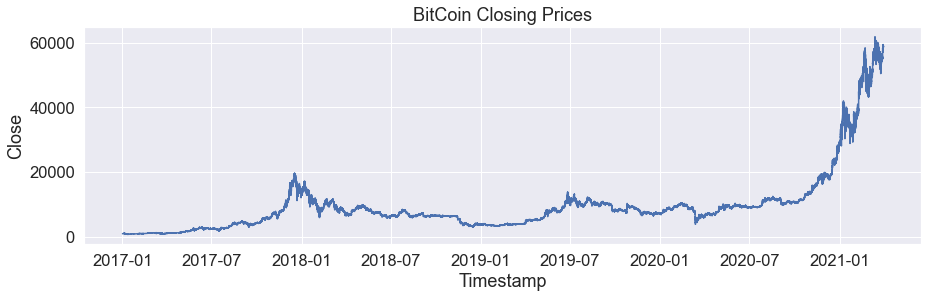

In [111]:
plt.figure(figsize=(15,4))
(sns.lineplot(x=cropped.index, y="Close", data=cropped).set_title("BitCoin Closing Prices"))

Text(0.5, 1.0, 'BitCoin Closing Prices')

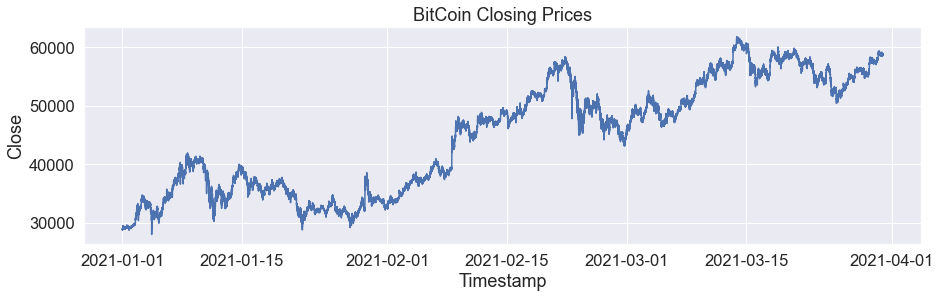

In [114]:
plt.figure(figsize=(15,4))
index_bools = cropped.index.year>2020
(sns.lineplot(x=cropped[index_bools].index, y="Close", data=cropped[index_bools]).set_title("BitCoin Closing Prices"))

In [120]:
new = cropped[cropped.index.year>2020]
new[new.index.month>=3].shape

(43115, 7)

In [113]:
test = cropped[cropped.index.year>2020]
test.shape

(128025, 7)

TODO:
    -Find out how many observations there are in a year? 6 months? (Google this)
    -Play around with lag and timestep. Our original was 90. The smaller the lag size is, the more rows there will be. Experiment with long and short windows and see how  many data points that gives you.
    -Parameters for choosing proper window size:
        -Mean squared error for models
        -Loss
        -Graph out the loss and see the patterns for model performance
        -Graph out predictive value vs the actual values 
    -Train vs. Test Split?
        -Unique behavior from 2021 onward
        -43,000 ish datapoints from march 2021 onward
        -Maybe hardcode the train, valid, testing since we know where we want to stop

In [59]:
%%time
for i in range(len(bit_close)):
    bit_close.iloc[i, 7] + 100

IndexingError: Too many indexers

In [3]:
%%time
bit_close.close + 100

NameError: name 'bit_close' is not defined

Text(0.5, 1.0, 'Closing prices of Ripple')

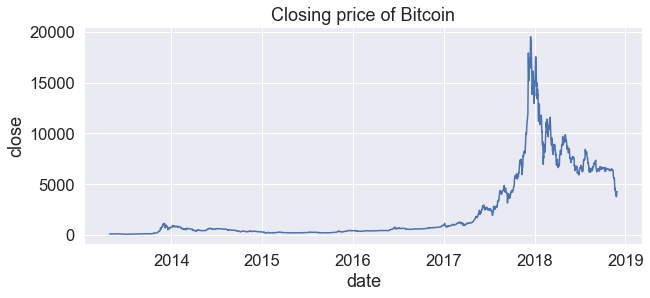

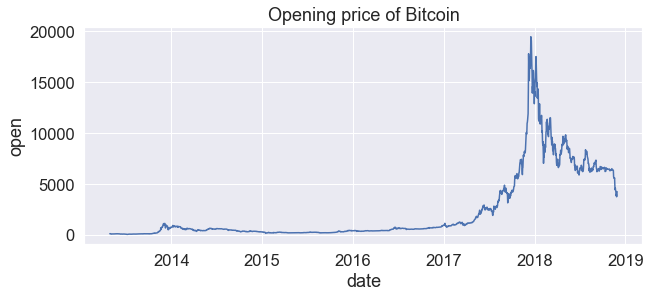

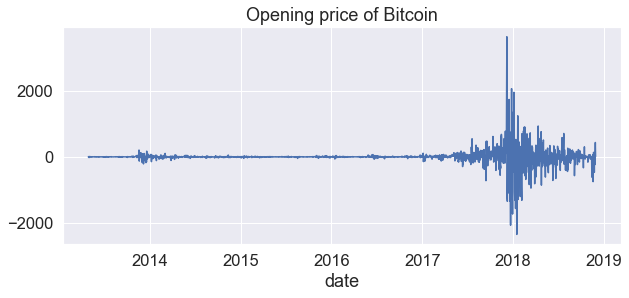

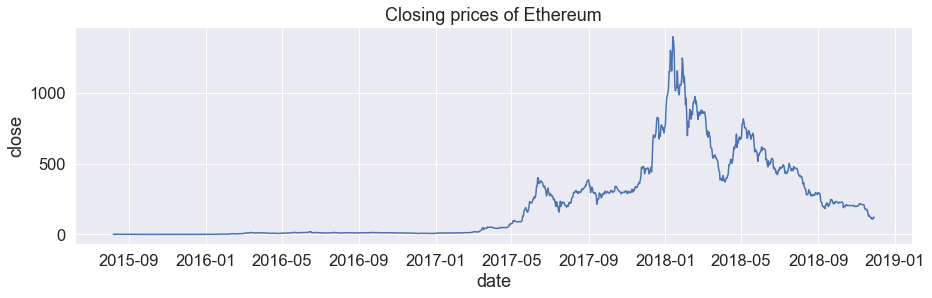

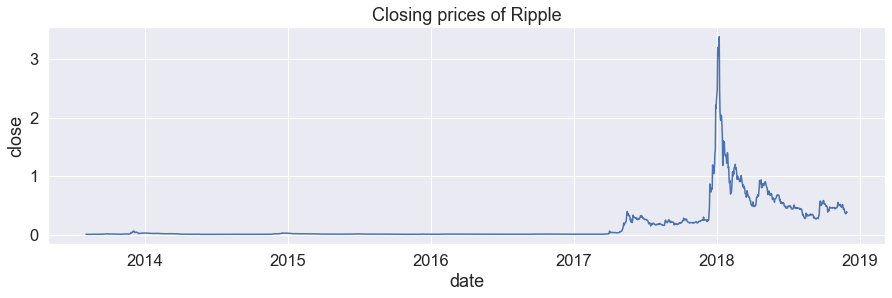

In [21]:
plt.figure(figsize=(10,4))
(sns.lineplot(x=bit_close.index, y="close", data=bit_close)
 .set_title("Closing price of Bitcoin"))

plt.figure(figsize=(10,4))
(sns.lineplot(x=bit_open.index, y="open", data=bit_open)
 .set_title("Opening price of Bitcoin"))

plt.figure(figsize=(10,4))
(sns.lineplot(x=bit_open.index, y=bit_open.close - bit_open.open)
 .set_title("Opening price of Bitcoin"))

plt.figure(figsize=(15,4))
(sns.lineplot(x=eth_close.index, y="close", data=eth_close).set_title("Closing prices of Ethereum"))

plt.figure(figsize=(15,4))
(sns.lineplot(x=ripple_close.index, y="close", data=ripple_close).set_title("Closing prices of Ripple"))